In [1]:
import pandas as pd
import numpy as np
import os
%matplotlib inline

In [2]:
edu = pd.read_excel('WIDE_01Sep2016.xlsx')

In [3]:
edu.columns

Index(['region_group', 'income_group', 'country', 'survey', 'year', 'level',
       'grade', 'category', 'subcategory1', 'subcategory2', 'subcategory3',
       'preschool_3_m', 'preschool_3_no', 'edu0_prim_m', 'edu0_prim_no',
       'comp_prim_v2_m', 'comp_prim_v2_no', 'comp_prim_1524_m',
       'comp_prim_1524_no', 'trans_prim_m', 'trans_prim_no',
       'comp_lowsec_v2_m', 'comp_lowsec_v2_no', 'comp_lowsec_1524_m',
       'comp_lowsec_1524_no', 'trans_lowsec_m', 'trans_lowsec_no',
       'comp_upsec_v2_m', 'comp_upsec_v2_no', 'comp_upsec_2029_m',
       'comp_upsec_2029_no', 'comp_higher_2529_m', 'comp_higher_2529_no',
       'edu_out_pry_m', 'edu_out_pry_no', 'edu_out_lowsec_m',
       'edu_out_lowsec_no', 'edu_out_upsec_m', 'edu_out_upsec_no',
       'overage2plus_m', 'overage2plus_no', 'edu2_20_m', 'edu2_20_no',
       'edu4_20_m', 'edu4_20_no', 'eduyears_20_m', 'eduyears_20_no',
       'literacy_1524_m', 'literacy_1524_no', 'mlevel1_m', 'mlevel1_no',
       'rlevel1_m', 'rlevel1_

In [4]:
edu_df = edu[["country", 'survey', 'year', 'category', 'subcategory1', 'subcategory2', 'subcategory3',
              'comp_upsec_v2_m', 'comp_upsec_v2_no', 'comp_upsec_2029_m', 'comp_upsec_2029_no', 'iso_code']]

In [5]:
edu_df = edu_df[(edu_df['category'] == 'Country Total Sex') & (edu_df['subcategory1'] == 'Female')]

In [6]:
edu_df.head()

,country,survey,year,category,subcategory1,subcategory2,subcategory3,comp_upsec_v2_m,comp_upsec_v2_no,comp_upsec_2029_m,comp_upsec_2029_no,iso_code
12,Afghanistan,MICS,2010.0,Country Total Sex,Female,NaN,NaN,0.055624,2020.0,0.038824,7698.0,AFG
214,Albania,MICS,2000.0,Country Total Sex,Female,NaN,NaN,0.463958,479.0,0.505189,1533.0,ALB
324,Albania,MICS,2005.0,Country Total Sex,Female,NaN,NaN,0.483785,470.0,0.477212,1385.0,ALB
465,Albania,DHS,2008.0,Country Total Sex,Female,NaN,NaN,0.469775,601.0,0.419894,1792.0,ALB
629,Argentina,EPH,2004.0,Country Total Sex,Female,NaN,NaN,0.658154,2978.0,0.643405,9811.0,ARG


In [7]:
edu_df = edu_df[['country', 'survey', 'year', 'comp_upsec_v2_m', 'comp_upsec_2029_m']]

In [8]:
edu_df[edu_df['country'].str.contains("Morocco")]

,country,survey,year,comp_upsec_v2_m,comp_upsec_2029_m
57618,Morocco,DHS,2003.0,0.173589,0.154292
57910,Morocco,HYS,2009.0,0.164587,0.141431
95640,Morocco,PIRLS,2006.0,NaN,NaN
95708,Morocco,PIRLS,2011.0,NaN,NaN
131842,Morocco,TIMSS,2003.0,NaN,NaN
131916,Morocco,TIMSS,2007.0,NaN,NaN
131990,Morocco,TIMSS,2011.0,NaN,NaN
132130,Morocco,TIMSS,1999.0,NaN,NaN
132203,Morocco,TIMSS,2003.0,NaN,NaN
132273,Morocco,TIMSS,2007.0,NaN,NaN


In [9]:
edu_df.to_csv('ineq_edu_df.csv')

In [10]:
edu_df.columns = [["COWname", 'survey', 'year', 'comp_upsec_v2_m', 'comp_upsec_2029_m']]

In [11]:
count_df = pd.read_csv('ts_aid_df.csv')

In [12]:
manual_map_list = {
    'U. R. Tanzania': 'Tanzania',
    'Bolivia, P. S.': 'Bolivia',
    'Israel': 'Israel and Palestine',
    'Palestine': 'Israel and Palestine',
    'Syrian A. R.': 'Syria',
    'TFYR Macedonia': 'Macedonia',
    'Russian Fed.': 'Russia',
    'Republic of Moldova':'Moldova',
    'Venezuela, B. R.': 'Venezuela',
    'United Arab Emirates':'UAE',
    'Lao PDR': 'Laos',
    'Iran, I. R.':'Iran',
    'Morocco':'Morocco and Western Sahara'
    }

In [13]:
for i in edu_df['COWname']:
    try:
        edu_df.loc[edu_df['COWname']==i, 'COWname'] = manual_map_list[i]
    except:
        continue

In [14]:
count_df = count_df.merge(edu_df, on = ["COWname", 'year'], how = 'outer')

In [15]:
count_df.describe()

,Unnamed: 0,year,MENA,SP.POP.TOTL,NY.GDP.MKTP.CD,NY.GDP.MKTP.KD.ZG,NY.GDP.PCAP.CD,polity2,durable,United Nations,United States,United Nations-Womens Aid,United States-Womens Aid,SE.SEC.CUAT.LO.FE.ZS,comp_upsec_v2_m,comp_upsec_2029_m
count,2060.000000,2538.000000,2060.000000,2.058000e+03,2.021000e+03,2021.000000,2021.000000,2021.000000,2060.000000,1.686000e+03,1.686000e+03,1.686000e+03,1.686000e+03,684.000000,403.000000,404.000000
mean,6517.061650,2006.626478,0.117476,4.253652e+07,3.073518e+11,4.572638,9250.847832,3.663038,22.998058,1.083226e+07,1.624768e+08,1.970901e+06,1.903193e+07,65.518067,0.367327,0.353258
std,622.722058,4.759899,0.322064,1.484011e+08,1.275919e+12,5.169441,15859.337903,6.248308,26.779241,1.503823e+07,5.078812e+08,2.637223e+06,6.227984e+07,26.102040,0.315963,0.312620
min,5420.000000,1990.000000,0.000000,4.238530e+05,2.200938e+08,-62.075920,112.849370,-10.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.941760,0.002312,0.003157
25%,5986.750000,2003.000000,0.000000,3.765520e+06,6.959697e+09,2.314711,915.267459,-2.000000,7.000000,2.730630e+06,8.011490e+06,4.994690e+05,0.000000e+00,46.445202,0.089443,0.088793
50%,6502.500000,2007.000000,0.000000,9.999820e+06,2.459532e+10,4.410275,3059.587582,6.000000,15.000000,5.115979e+06,4.430584e+07,1.108458e+06,2.667850e+05,68.584549,0.243402,0.228360
75%,7054.250000,2011.000000,0.000000,2.699075e+07,1.535450e+11,6.657224,8553.380470,9.000000,30.000000,1.363954e+07,1.297733e+08,2.411940e+06,9.265468e+06,90.232401,0.678152,0.633686
max,7919.000000,2016.000000,1.000000,1.357380e+09,1.803660e+13,63.379875,106018.492800,10.000000,206.000000,1.693735e+08,1.111868e+10,3.063148e+07,5.965536e+08,100.000000,0.977646,0.967155


In [16]:
count_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2538 entries, 0 to 2537
Data columns (total 18 columns):
Unnamed: 0                   2060 non-null float64
year                         2538 non-null float64
COWname                      2538 non-null object
MENA                         2060 non-null float64
SP.POP.TOTL                  2058 non-null float64
NY.GDP.MKTP.CD               2021 non-null float64
NY.GDP.MKTP.KD.ZG            2021 non-null float64
NY.GDP.PCAP.CD               2021 non-null float64
polity2                      2021 non-null float64
durable                      2060 non-null float64
United Nations               1686 non-null float64
United States                1686 non-null float64
United Nations-Womens Aid    1686 non-null float64
United States-Womens Aid     1686 non-null float64
SE.SEC.CUAT.LO.FE.ZS         684 non-null float64
survey                       1148 non-null object
comp_upsec_v2_m              403 non-null float64
comp_upsec_2029_m            4

In [17]:
a_list = list(count_df['COWname'].unique())

In [18]:
a_list.sort()

In [19]:
a_list

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 "Côte d'Ivoire",
 'D. R. Congo',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel and Palestine',
 'Italy',
 'I

In [20]:
samp = count_df[(count_df['SE.SEC.CUAT.LO.FE.ZS'].notnull()) & ((count_df['comp_upsec_v2_m'].notnull()) | 
         (count_df['comp_upsec_2029_m'].notnull()))]

In [21]:
samp.head()

,Unnamed: 0,year,COWname,MENA,SP.POP.TOTL,NY.GDP.MKTP.CD,NY.GDP.MKTP.KD.ZG,NY.GDP.PCAP.CD,polity2,durable,United Nations,United States,United Nations-Womens Aid,United States-Womens Aid,SE.SEC.CUAT.LO.FE.ZS,survey,comp_upsec_v2_m,comp_upsec_2029_m
249,5705.0,2002.0,South Africa,0.0,4.585548e+07,1.154820e+11,3.667797,2518.398261,9.0,8.0,7104103.0,83443732.0,4205858.0,11188784.0,59.745209,GHS,0.357817,0.381775
445,5909.0,2004.0,Brazil,0.0,1.847385e+08,6.693160e+11,5.759876,3623.047667,8.0,19.0,7642055.0,110719208.0,408789.0,7085973.0,43.184990,PNAD,0.141075,0.153349
596,6078.0,2005.0,Colombia,0.0,4.328563e+07,1.465660e+11,4.706556,3386.025600,7.0,48.0,5445206.0,834363578.0,789825.0,90687.0,41.212292,DHS,0.626642,0.593579
602,6084.0,2005.0,Cyprus,0.0,1.027658e+06,1.870315e+10,3.724318,25324.486660,10.0,31.0,NaN,NaN,NaN,NaN,65.845337,EU-SILC,0.932206,0.907583
611,6097.0,2005.0,France,0.0,6.317936e+07,2.203680e+12,1.607714,34879.726330,9.0,36.0,NaN,NaN,NaN,NaN,71.341049,EU-SILC,0.812363,0.857294


In [22]:
len(samp)

74

In [23]:
a_list = []
for x, y in zip(samp['SE.SEC.CUAT.LO.FE.ZS'], samp['comp_upsec_v2_m']):
    try:
        a_list.append((x/100)-y)
    except:
        a_list.append(0)

In [24]:
a_list

[0.23963548740000001,
 0.29077529930000001,
 -0.21451928279999999,
 -0.27375253090000007,
 -0.098952508099999892,
 0.1033850918,
 0.080785320500000091,
 -0.1279558999999999,
 0.10155389920000002,
 -0.072915304400000047,
 0.11299709639999989,
 0.049633762499999956,
 -0.22415280710000002,
 0.047011818600000033,
 -0.12291941849999999,
 -0.011641266100000047,
 0.30783041869999994,
 0.034407697940000002,
 0.090044298100000003,
 -0.054902292500000005,
 0.30813170049999999,
 -0.071845816700000009,
 -0.084816211100000038,
 -0.039943586699999978,
 -0.20811948650000001,
 0.31784368450000006,
 -0.15204079050000002,
 0.31234139740000005,
 -0.11714387150000005,
 0.31692268509999999,
 0.045980614600000025,
 0.16735098740000004,
 -0.22602691860000002,
 0.13270056479999992,
 0.102058078,
 0.031939899600000002,
 -0.31487481729999994,
 0.33591849079999991,
 0.18654767569999997,
 0.13859291900000004,
 -0.1469872082,
 -0.058904101499999972,
 -0.16720066590000005,
 0.070615799610000016,
 0.1505624097999999

In [25]:
a_list = []
for x, y in zip(samp['SE.SEC.CUAT.LO.FE.ZS'], samp['comp_upsec_2029_m']):
    try:
        a_list.append((x/100)-y)
    except:
        a_list.append(0)

In [26]:
a_list

[0.21567668740000001,
 0.27850049929999998,
 -0.18145628279999992,
 -0.24912923090000005,
 -0.14388300809999999,
 0.097810691800000016,
 0.038373320500000085,
 -0.11536439999999992,
 0.1521557992,
 -0.035163104400000034,
 0.060566796399999956,
 0.049761662499999915,
 -0.27468170710000001,
 0.026339718600000062,
 -0.15260841849999995,
 -0.016517866100000056,
 0.28969641869999996,
 0.02967849794,
 0.091044898100000007,
 -0.060215792500000032,
 0.29206170050000002,
 -0.038172516699999992,
 -0.049833011100000046,
 0.0091989133000000001,
 -0.18720318650000001,
 0.36772448450000006,
 -0.092046890500000034,
 0.29813219740000008,
 -0.10340157149999996,
 0.29365738510000006,
 0.059760814599999934,
 0.20104138740000005,
 -0.22310631859999996,
 0.24482506479999999,
 0.27390727800000003,
 0.043698399600000007,
 -0.21561991730000002,
 0.31381169079999993,
 0.2430721757,
 0.19552021900000005,
 -0.13235780819999998,
 0.0039393985000000242,
 -0.12135346590000007,
 0.06812629961000001,
 0.2360887097999

In [27]:
#^^ ok so these are clearly two different measures. rather than doing an analysis on just MENA countries, 
# we'll see how effective aid is over all to women completing secondary school.

In [28]:
count_df = count_df.drop('Unnamed: 0', axis =1)

In [29]:
count_df['SE.SEC.CUAT.LO.FE.ZS'] = count_df['SE.SEC.CUAT.LO.FE.ZS']/100

In [30]:
count_df.columns

Index(['year', 'COWname', 'MENA', 'SP.POP.TOTL', 'NY.GDP.MKTP.CD',
       'NY.GDP.MKTP.KD.ZG', 'NY.GDP.PCAP.CD', 'polity2', 'durable',
       'United Nations', 'United States', 'United Nations-Womens Aid',
       'United States-Womens Aid', 'SE.SEC.CUAT.LO.FE.ZS', 'survey',
       'comp_upsec_v2_m', 'comp_upsec_2029_m'],
      dtype='object')

In [31]:
for i in ['SP.POP.TOTL', 'NY.GDP.MKTP.CD', 'NY.GDP.PCAP.CD', 'United Nations', 'United States',
         'United Nations-Womens Aid', 'United States-Womens Aid']:
    count_df.loc[count_df[i]!=0, i] = np.log(count_df.loc[count_df[i]!=0, i])

In [32]:
count_df.head()

,year,COWname,MENA,SP.POP.TOTL,NY.GDP.MKTP.CD,NY.GDP.MKTP.KD.ZG,NY.GDP.PCAP.CD,polity2,durable,United Nations,United States,United Nations-Womens Aid,United States-Womens Aid,SE.SEC.CUAT.LO.FE.ZS,survey,comp_upsec_v2_m,comp_upsec_2029_m
0,2001.0,Afghanistan,0.0,16.858435,21.624104,NaN,4.765669,NaN,0.0,16.581231,16.766128,14.046304,0.000000,NaN,NaN,NaN,NaN
1,2001.0,Albania,0.0,14.933982,22.124636,7.940331,7.190654,5.0,4.0,14.322935,17.998870,13.605066,14.508213,0.709966,NaN,NaN,NaN
2,2001.0,Algeria,1.0,17.268419,24.725947,3.008395,7.457527,-3.0,6.0,15.049187,20.193205,12.787503,0.000000,NaN,NaN,NaN,NaN
3,2001.0,Angola,0.0,16.647739,22.913361,4.220965,6.265622,-3.0,4.0,16.524282,17.690892,15.094777,14.433624,NaN,NaN,NaN,NaN
4,2001.0,Argentina,0.0,17.439091,26.316850,-4.408840,8.877758,8.0,18.0,14.643022,15.259334,13.250151,0.000000,0.460988,PIRLS,NaN,NaN


In [33]:
# sort by country and year
count_df.sort_values(by=['COWname', 'year'], ascending=True, inplace=True)
count_df.head()

,year,COWname,MENA,SP.POP.TOTL,NY.GDP.MKTP.CD,NY.GDP.MKTP.KD.ZG,NY.GDP.PCAP.CD,polity2,durable,United Nations,United States,United Nations-Womens Aid,United States-Womens Aid,SE.SEC.CUAT.LO.FE.ZS,survey,comp_upsec_v2_m,comp_upsec_2029_m
0,2001.0,Afghanistan,0.0,16.858435,21.624104,NaN,4.765669,NaN,0.0,16.581231,16.766128,14.046304,0.000000,NaN,NaN,NaN,NaN
136,2002.0,Afghanistan,0.0,16.905640,22.141258,NaN,5.235618,NaN,0.0,16.728491,20.305702,14.899597,15.631586,NaN,NaN,NaN,NaN
272,2003.0,Afghanistan,0.0,16.953820,22.245760,8.444163,5.291940,NaN,0.0,17.094071,20.840867,15.577129,13.950043,NaN,NaN,NaN,NaN
430,2004.0,Afghanistan,0.0,16.998510,22.388227,1.055556,5.389717,NaN,0.0,16.956380,21.224443,14.513853,13.057279,NaN,NaN,NaN,NaN
571,2005.0,Afghanistan,0.0,17.037214,22.559851,11.175270,5.522637,NaN,0.0,17.328844,21.402942,14.797726,12.935776,NaN,NaN,NaN,NaN


In [34]:
# lag control variables by two years
# we sorted by group and year, so the years are now in proper order to just shift everything "down" within the country group
count_df['pop_lag'] = count_df.groupby(['COWname'])['SP.POP.TOTL'].shift(2)
count_df['gdp_lag'] = count_df.groupby(['COWname'])['NY.GDP.MKTP.CD'].shift(2)
count_df['gdp_growth_lag'] = count_df.groupby(['COWname'])['NY.GDP.MKTP.KD.ZG'].shift(2)
count_df['gdp_pcap_lag'] = count_df.groupby(['COWname'])['NY.GDP.PCAP.CD'].shift(2)
count_df['polity2_lag'] = count_df.groupby(['COWname'])['polity2'].shift(2)
count_df['durable_lag'] = count_df.groupby(['COWname'])['durable'].shift(2)
count_df.head()

,year,COWname,MENA,SP.POP.TOTL,NY.GDP.MKTP.CD,NY.GDP.MKTP.KD.ZG,NY.GDP.PCAP.CD,polity2,durable,United Nations,...,SE.SEC.CUAT.LO.FE.ZS,survey,comp_upsec_v2_m,comp_upsec_2029_m,pop_lag,gdp_lag,gdp_growth_lag,gdp_pcap_lag,polity2_lag,durable_lag
0,2001.0,Afghanistan,0.0,16.858435,21.624104,NaN,4.765669,NaN,0.0,16.581231,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,2002.0,Afghanistan,0.0,16.905640,22.141258,NaN,5.235618,NaN,0.0,16.728491,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272,2003.0,Afghanistan,0.0,16.953820,22.245760,8.444163,5.291940,NaN,0.0,17.094071,...,NaN,NaN,NaN,NaN,16.858435,21.624104,NaN,4.765669,NaN,0.0
430,2004.0,Afghanistan,0.0,16.998510,22.388227,1.055556,5.389717,NaN,0.0,16.956380,...,NaN,NaN,NaN,NaN,16.905640,22.141258,NaN,5.235618,NaN,0.0
571,2005.0,Afghanistan,0.0,17.037214,22.559851,11.175270,5.522637,NaN,0.0,17.328844,...,NaN,NaN,NaN,NaN,16.953820,22.245760,8.444163,5.291940,NaN,0.0


In [35]:
# lag aid by one year
count_df['UN_aid_lag'] = count_df.groupby(['COWname'])['United Nations'].shift(1)
count_df['US_aid_lag'] = count_df.groupby(['COWname'])['United States'].shift(1)
count_df['UN_W_aid_lag'] = count_df.groupby(['COWname'])['United Nations-Womens Aid'].shift(1)
count_df['US_W_aid_lag'] = count_df.groupby(['COWname'])['United States-Womens Aid'].shift(1)
count_df.head()

,year,COWname,MENA,SP.POP.TOTL,NY.GDP.MKTP.CD,NY.GDP.MKTP.KD.ZG,NY.GDP.PCAP.CD,polity2,durable,United Nations,...,pop_lag,gdp_lag,gdp_growth_lag,gdp_pcap_lag,polity2_lag,durable_lag,UN_aid_lag,US_aid_lag,UN_W_aid_lag,US_W_aid_lag
0,2001.0,Afghanistan,0.0,16.858435,21.624104,NaN,4.765669,NaN,0.0,16.581231,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,2002.0,Afghanistan,0.0,16.905640,22.141258,NaN,5.235618,NaN,0.0,16.728491,...,NaN,NaN,NaN,NaN,NaN,NaN,16.581231,16.766128,14.046304,0.000000
272,2003.0,Afghanistan,0.0,16.953820,22.245760,8.444163,5.291940,NaN,0.0,17.094071,...,16.858435,21.624104,NaN,4.765669,NaN,0.0,16.728491,20.305702,14.899597,15.631586
430,2004.0,Afghanistan,0.0,16.998510,22.388227,1.055556,5.389717,NaN,0.0,16.956380,...,16.905640,22.141258,NaN,5.235618,NaN,0.0,17.094071,20.840867,15.577129,13.950043
571,2005.0,Afghanistan,0.0,17.037214,22.559851,11.175270,5.522637,NaN,0.0,17.328844,...,16.953820,22.245760,8.444163,5.291940,NaN,0.0,16.956380,21.224443,14.513853,13.057279


In [36]:
sample = count_df[['year', 'COWname', 'SP.POP.TOTL', 'NY.GDP.MKTP.CD', 'United Nations', "United States", 'pop_lag', 'gdp_lag', 'UN_aid_lag', 'US_aid_lag']].head()

In [37]:
sample

,year,COWname,SP.POP.TOTL,NY.GDP.MKTP.CD,United Nations,United States,pop_lag,gdp_lag,UN_aid_lag,US_aid_lag
0,2001.0,Afghanistan,16.858435,21.624104,16.581231,16.766128,NaN,NaN,NaN,NaN
136,2002.0,Afghanistan,16.905640,22.141258,16.728491,20.305702,NaN,NaN,16.581231,16.766128
272,2003.0,Afghanistan,16.953820,22.245760,17.094071,20.840867,16.858435,21.624104,16.728491,20.305702
430,2004.0,Afghanistan,16.998510,22.388227,16.956380,21.224443,16.905640,22.141258,17.094071,20.840867
571,2005.0,Afghanistan,17.037214,22.559851,17.328844,21.402942,16.953820,22.245760,16.956380,21.224443


In [38]:
sample.columns = ['year', 'country', 'log_population', 'log_gdp', 'UN_aid', 'US_aid', 'pop_lag_2','gdp_lag_2', 'UN_aid_lag_1', 'US_aid_lag_1' ]

In [39]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence

/Users/nmolivo/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


ok we're going to fit three models.
- One where we use the World Bank indicator, 
- the second where we use the first World Inequality Database on Education indicator
- the thrid we use the second World Inequality Database on Education indicator

## Model 1 Target Variable: WDI data on women's completion of secondary education

In [42]:
model_1 = count_df[['pop_lag', 'gdp_lag', 'gdp_growth_lag', 'gdp_pcap_lag', 'polity2_lag', 'durable_lag', 
                    'UN_aid_lag', 'US_aid_lag', 'UN_W_aid_lag', 'US_W_aid_lag', 'SE.SEC.CUAT.LO.FE.ZS']]
model_1.dropna(inplace = True)

X_1 = model_1[['pop_lag', 'gdp_lag', 'gdp_growth_lag', 'gdp_pcap_lag', 'polity2_lag', 'durable_lag', 
               'UN_aid_lag', 'US_aid_lag', 'UN_W_aid_lag', 'US_W_aid_lag']]
y_1 = model_1['SE.SEC.CUAT.LO.FE.ZS']

/Users/nmolivo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [43]:
gbr = GradientBoostingRegressor()
gbr.fit(X_1, y_1)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [44]:
gbr.score(X_1, y_1)

0.95782552327446435

In [45]:
list(zip(X_1.columns, gbr.feature_importances_))

[('pop_lag', 0.1853481357449957),
 ('gdp_lag', 0.089341110501354362),
 ('gdp_growth_lag', 0.097840443364413152),
 ('gdp_pcap_lag', 0.123150046194237),
 ('polity2_lag', 0.11525732147882016),
 ('durable_lag', 0.10337460922119832),
 ('UN_aid_lag', 0.10861707646717743),
 ('US_aid_lag', 0.086208066996979457),
 ('UN_W_aid_lag', 0.069808941694587553),
 ('US_W_aid_lag', 0.021054248336236828)]

In [46]:
imp = pd.DataFrame({'importance': list(gbr.feature_importances_)}, index=X_1.columns)
imp.sort_values(by='importance', ascending=False, inplace=True)

In [47]:
imp.head()

,importance
pop_lag,0.185348
gdp_pcap_lag,0.123150
polity2_lag,0.115257
UN_aid_lag,0.108617
durable_lag,0.103375


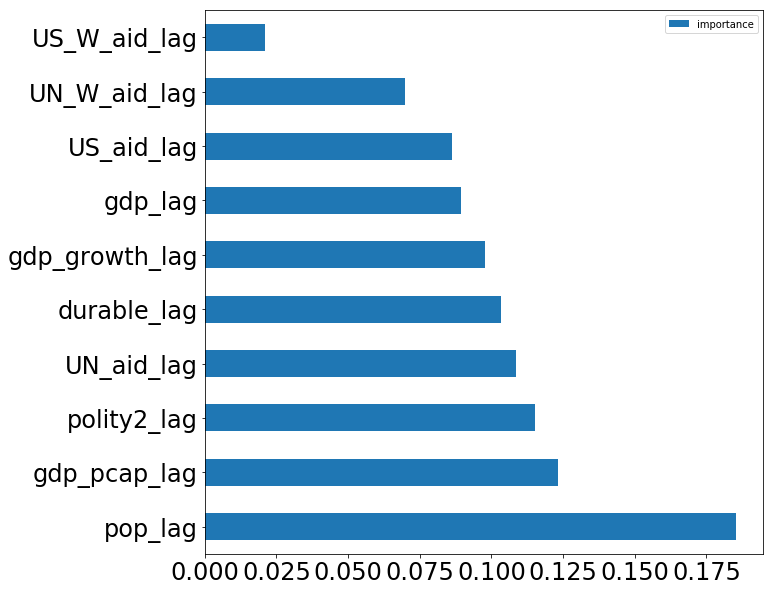

In [48]:
%matplotlib inline
imp.plot(kind='barh', fontsize=24, figsize=(10,10))

In [50]:
model_counts = count_df[['COWname', 'year', 'pop_lag', 'gdp_lag', 'gdp_growth_lag', 'gdp_pcap_lag', 'polity2_lag', 'durable_lag', 
                    'UN_aid_lag', 'US_aid_lag', 'UN_W_aid_lag', 'US_W_aid_lag', 'SE.SEC.CUAT.LO.FE.ZS']]

In [51]:
model_counts.dropna(inplace=True)

/Users/nmolivo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [57]:
model_counts['year'].unique()

array([ 2008.,  2011.,  2012.,  2006.,  2003.,  2007.,  2009.,  2010.,
        2013.,  2004.,  2005.])

## Model 2 Target Variable: World Inequality Database indicator on women's completion of (lower) secondary education

In [58]:
model_2 = count_df[['pop_lag', 'gdp_lag', 'gdp_growth_lag', 'gdp_pcap_lag', 'polity2_lag', 'durable_lag', 
                    'UN_aid_lag', 'US_aid_lag', 'UN_W_aid_lag', 'US_W_aid_lag', 'comp_upsec_v2_m']]
model_2.dropna(inplace = True)

X_2 = model_2[['pop_lag', 'gdp_lag', 'gdp_growth_lag', 'gdp_pcap_lag', 'polity2_lag', 'durable_lag', 
               'UN_aid_lag', 'US_aid_lag', 'UN_W_aid_lag', 'US_W_aid_lag']]
y_2 = model_2['comp_upsec_v2_m']

/Users/nmolivo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [60]:
gbr = GradientBoostingRegressor()
gbr.fit(X_2, y_2)
gbr.score(X_2, y_2)

0.96918873725142218

In [66]:
imp = pd.DataFrame({'importance': list(gbr.feature_importances_)}, index=X_2.columns)
imp.sort_values(by='importance', ascending=False, inplace=True)

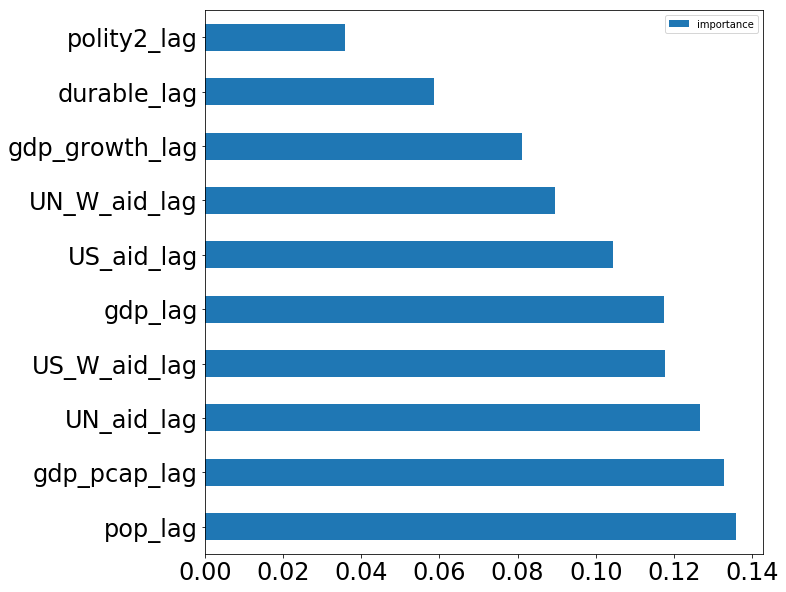

In [67]:
imp.plot(kind='barh', fontsize=24, figsize=(10,10))

## Model 3 Target Variable: World Inequality Database indicator on women's completion of (upper) secondary education

In [64]:
model_3 = count_df[['pop_lag', 'gdp_lag', 'gdp_growth_lag', 'gdp_pcap_lag', 'polity2_lag', 'durable_lag', 
                    'UN_aid_lag', 'US_aid_lag', 'UN_W_aid_lag', 'US_W_aid_lag', 'comp_upsec_2029_m']]
model_3.dropna(inplace = True)

X_3 = model_3[['pop_lag', 'gdp_lag', 'gdp_growth_lag', 'gdp_pcap_lag', 'polity2_lag', 'durable_lag', 
               'UN_aid_lag', 'US_aid_lag', 'UN_W_aid_lag', 'US_W_aid_lag']]
y_3 = model_3['comp_upsec_2029_m']

/Users/nmolivo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [65]:
gbr = GradientBoostingRegressor()
gbr.fit(X_3, y_3)
gbr.score(X_3, y_3)

0.97082107423459874

In [68]:
imp = pd.DataFrame({'importance': list(gbr.feature_importances_)}, index=X_3.columns)
imp.sort_values(by='importance', ascending=False, inplace=True)

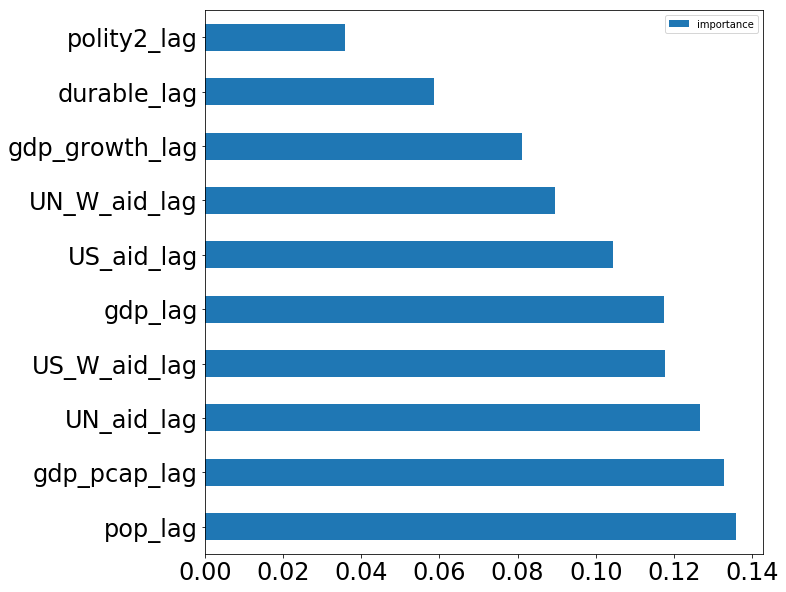

In [71]:
imp.plot(kind='barh', fontsize=24, figsize=(10,10))